# ADS505 Final Project (Team 2)

## Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


warnings.filterwarnings("ignore")

## Descriptive Analytics

In [2]:
# load the dataset
df = pd.read_csv('./Big_Black_Money_Dataset_V2.csv')
df.head()

,Unnamed: 0,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,0,TX0000000001,Brazil,70642,Offshore Transfer,1/1/13 0:00,Person_1101,Construction,USA,True,Legal,4.943966,1,Bank_40,Singapore
1,1,TX0000000002,China,308761,Stocks Transfer,1/1/13 1:00,Person_7484,Luxury Goods,South Africa,False,Legal,5.217588,0,Bank_461,Bahamas
2,2,TX0000000003,UK,319746,Stocks Transfer,1/1/13 2:00,Person_3655,Construction,Switzerland,True,Illegal,6.904060,3,Bank_387,Switzerland
3,3,TX0000000004,UAE,55036,Cash Withdrawal,1/1/13 3:00,Person_3226,Oil & Gas,Russia,False,Legal,6.102097,2,Bank_353,Panama
4,4,TX0000000005,South Africa,50838,Cryptocurrency,1/1/13 4:00,Person_7975,Real Estate,USA,True,Legal,3.784610,9,Bank_57,Luxembourg


In [3]:
# Data Structure
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   10000 non-null  int64  
 1   Transaction ID               10000 non-null  object 
 2   Country                      10000 non-null  object 
 3   Amount (USD)                 10000 non-null  int64  
 4   Transaction Type             10000 non-null  object 
 5   Date of Transaction          10000 non-null  object 
 6   Person Involved              10000 non-null  object 
 7   Industry                     10000 non-null  object 
 8   Destination Country          10000 non-null  object 
 9   Reported by Authority        10000 non-null  bool   
 10  Source of Money              10000 non-null  object 
 11  Money Laundering Risk Score  10000 non-null  float64
 12  Shell Companies Involved     10000 non-null  int64  
 13  Financial Institu

In [4]:
# Convert 'Date of Transaction' to datetime
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Convert datetime to seconds since epoch
df['Transaction_Seconds'] = (df['Date of Transaction'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

## Univariate Analysis

In [5]:
# Summary statistics
print(df.describe())
print()

# Unique Value Counts
print('Unique Column Values Count')
print('-------------------------------')
print(df.nunique())

        Unnamed: 0  Amount (USD)  Date of Transaction  \
count  10000.00000  1.000000e+04                10000   
mean    4999.50000  1.762247e+05  2013-07-28 07:30:00   
min        0.00000  1.000000e+00  2013-01-01 00:00:00   
25%     2499.75000  5.261950e+04  2013-04-15 03:45:00   
50%     4999.50000  1.062550e+05  2013-07-28 07:30:00   
75%     7499.25000  2.120970e+05  2013-11-09 11:15:00   
max     9999.00000  5.250000e+06  2014-02-21 15:00:00   
std     2886.89568  2.258833e+05                  NaN   

       Money Laundering Risk Score  Shell Companies Involved  \
count                 10000.000000              10000.000000   
mean                      5.198323                  4.469400   
min                       1.509904                  0.000000   
25%                       4.407336                  2.000000   
50%                       5.121634                  4.000000   
75%                       5.917360                  7.000000   
max                       9.968095    

## Multivariate Analysis

### Correlation Heatmap

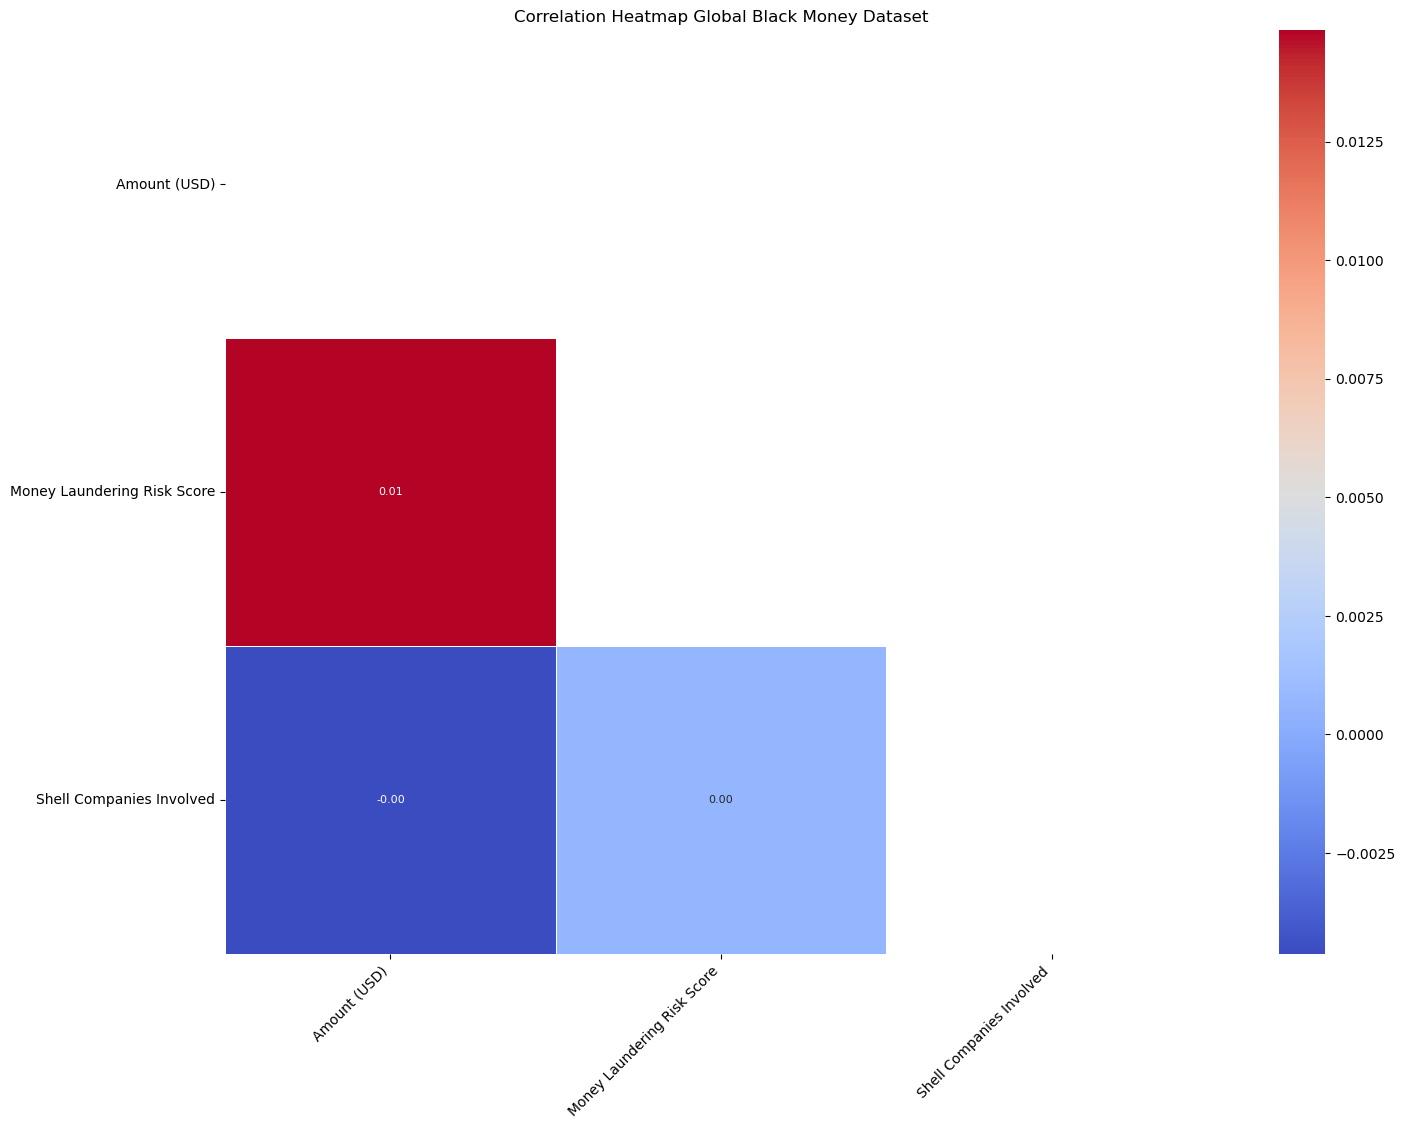

In [6]:
# Define Numeric Variables
numeric_predictors = ['Amount (USD)', 'Money Laundering Risk Score',  'Shell Companies Involved']

# Init Correlation Matrix
corr_matrix = df[numeric_predictors].corr()

# Create a heatmap
corr_matrix = corr_matrix

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8})

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Heatmap Global Black Money Dataset')

# Show the heatmap
plt.show()

### Distribution of illegal vs legal transactions

Source of Money
Legal      8983
Illegal    1017
Name: count, dtype: int64


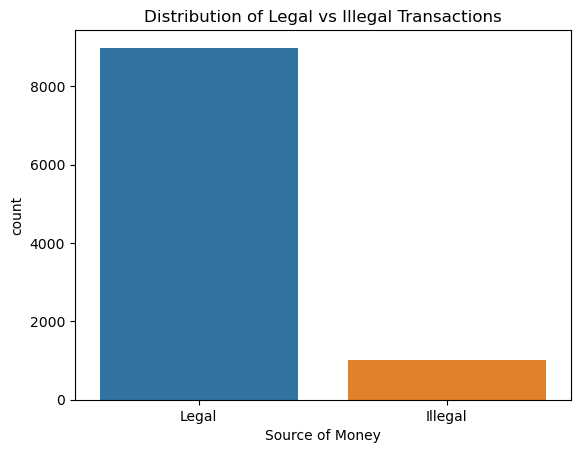

In [7]:
# Distribution of illegal vs legal transactions
print(df['Source of Money'].value_counts())

sns.countplot(x='Source of Money', data=df)
plt.title('Distribution of Legal vs Illegal Transactions')
plt.show()

### Distribution of illegal transactions by Industry

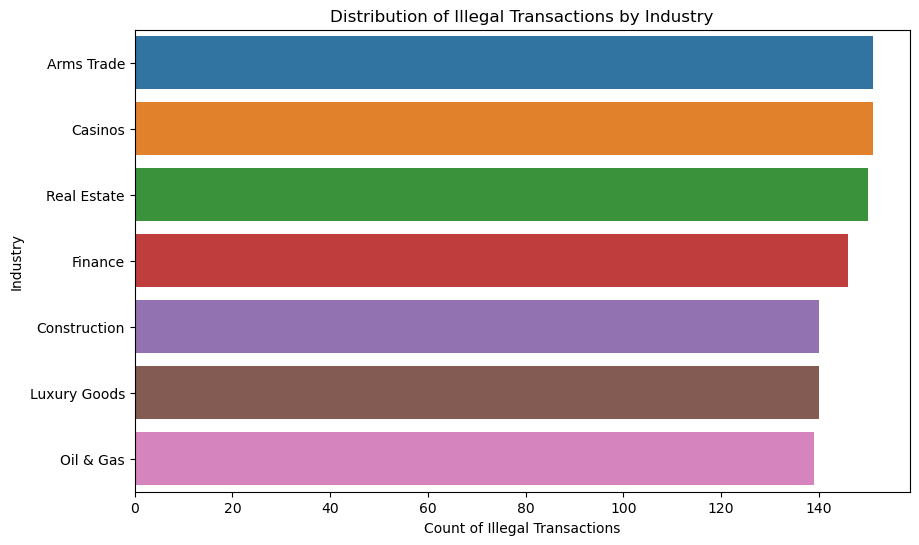

In [8]:
# Filter the dataset for illegal transactions
illegal_transactions = df[df['Source of Money'] == 'Illegal']

plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', data=illegal_transactions, order=illegal_transactions['Industry'].value_counts().index)
plt.title('Distribution of Illegal Transactions by Industry')
plt.xlabel('Count of Illegal Transactions')
plt.ylabel('Industry')
plt.show()

In [9]:
print(illegal_transactions['Industry'].value_counts())  # Check if there are illegal transactions by industry

Industry
Arms Trade      151
Casinos         151
Real Estate     150
Finance         146
Construction    140
Luxury Goods    140
Oil & Gas       139
Name: count, dtype: int64


In [10]:
print(illegal_transactions.head())  # Show a sample of illegal transactions

# Check for missing values in the 'Industry' column
print(illegal_transactions['Industry'].isnull().sum())  # How many missing values in 'Industry'

# Check the distribution of values in the 'Industry' column
print(illegal_transactions['Industry'].value_counts())  # Check how many illegal transactions per industry

    Unnamed: 0 Transaction ID       Country  Amount (USD)   Transaction Type  \
2            2   TX0000000003            UK        319746    Stocks Transfer   
9            9   TX0000000010         China        305537  Offshore Transfer   
18          18   TX0000000019  South Africa         31263     Cryptocurrency   
21          21   TX0000000022           USA         64215  Property Purchase   
52          52   TX0000000053        Brazil        515486    Stocks Transfer   

   Date of Transaction Person Involved      Industry Destination Country  \
2  2013-01-01 02:00:00     Person_3655  Construction         Switzerland   
9  2013-01-01 09:00:00     Person_9585    Arms Trade               China   
18 2013-01-01 18:00:00     Person_2149  Luxury Goods                  UK   
21 2013-01-01 21:00:00     Person_6311     Oil & Gas           Singapore   
52 2013-01-03 04:00:00     Person_3863  Construction               India   

    Reported by Authority Source of Money  Money Laundering Ri

### Distribution of overall transaction amount

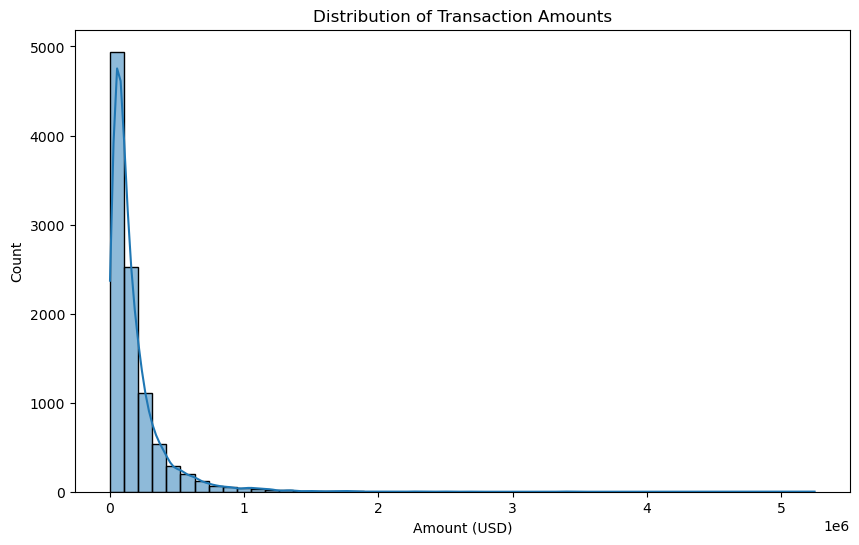

In [11]:
# Distribution of the overall transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount (USD)'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.show()

### Transaction amount by source

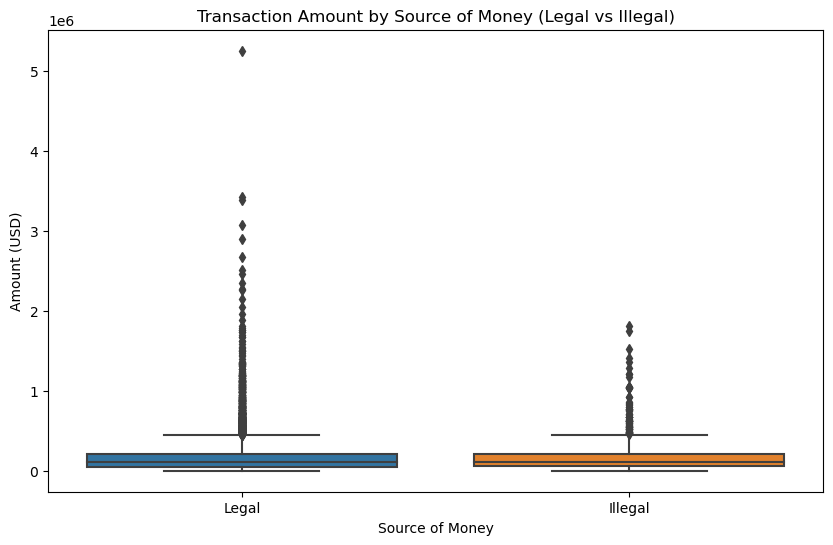

In [12]:
# Boxplot to compare Amount by Source of Money
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source of Money', y='Amount (USD)', data=df)
plt.title('Transaction Amount by Source of Money (Legal vs Illegal)')
plt.show()

### Distribution of money laundering risk score

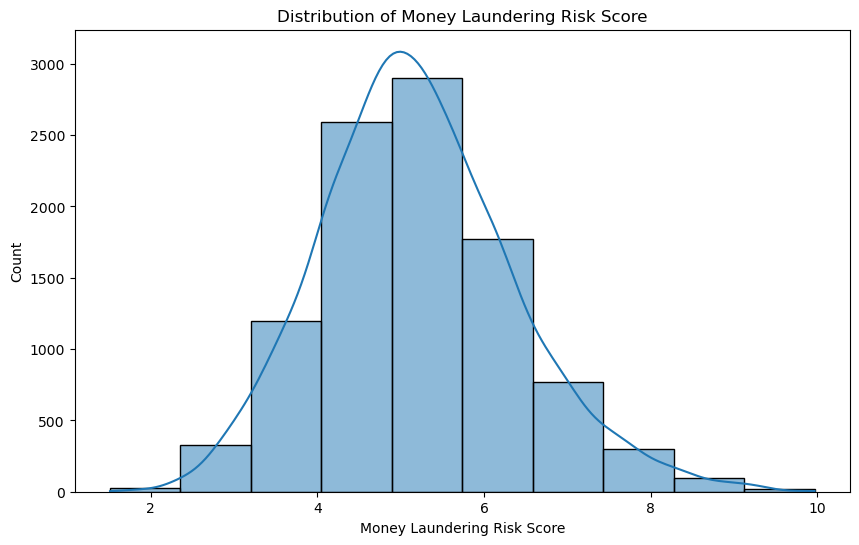

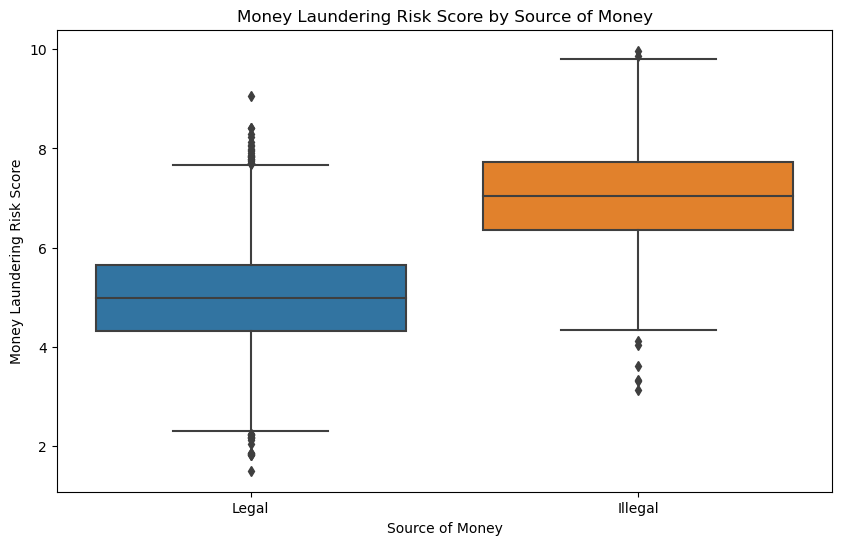

In [13]:
# Money Laundering Risk Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Money Laundering Risk Score'], bins=10, kde=True)
plt.title('Distribution of Money Laundering Risk Score')
plt.show()

# Boxplot to compare Risk Score by Source of Money
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source of Money', y='Money Laundering Risk Score', data=df)
plt.title('Money Laundering Risk Score by Source of Money')
plt.show()

### Distribution of Illegal Transactions by Country

Country
Brazil          171
UAE             154
UK              144
Singapore        93
India            87
China            83
Russia           79
USA              75
Switzerland      68
South Africa     63
Name: count, dtype: int64


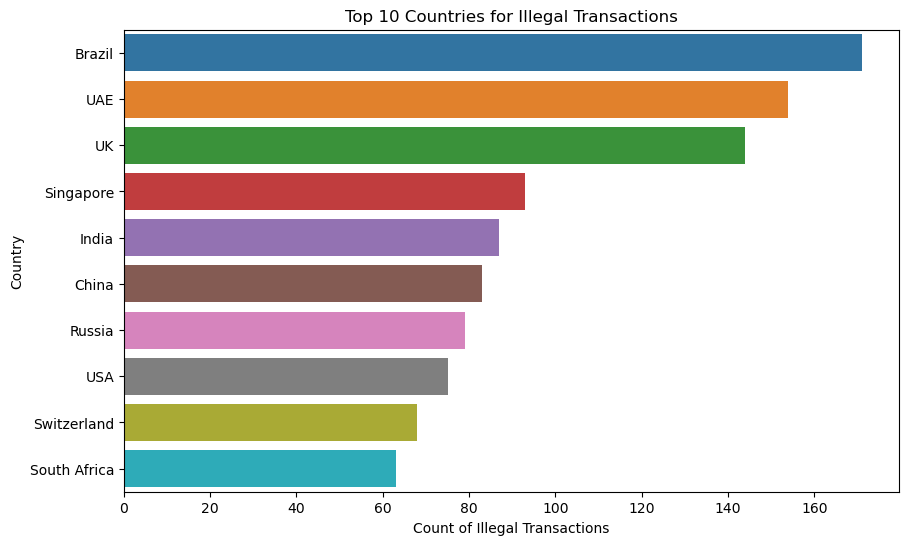

In [14]:
# Top countries for illegal transactions
illegal_countries = df[df['Source of Money'] == 'Illegal']['Country'].value_counts().head(10)
print(illegal_countries)

# top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=illegal_countries.values, y=illegal_countries.index)
plt.title('Top 10 Countries for Illegal Transactions')
plt.xlabel('Count of Illegal Transactions')
plt.show()

In [15]:
print(df.dtypes)

# Selecting categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Categorical Variables:', categorical_vars)

# Display unique values for categorical columns
for col in categorical_vars:
    print(f"{col}: {df[col].unique()}")

Unnamed: 0                              int64
Transaction ID                         object
Country                                object
Amount (USD)                            int64
Transaction Type                       object
Date of Transaction            datetime64[ns]
Person Involved                        object
Industry                               object
Destination Country                    object
Reported by Authority                    bool
Source of Money                        object
Money Laundering Risk Score           float64
Shell Companies Involved                int64
Financial Institution                  object
Tax Haven Country                      object
Transaction_Seconds                     int64
dtype: object
Categorical Variables: ['Transaction ID', 'Country', 'Transaction Type', 'Person Involved', 'Industry', 'Destination Country', 'Source of Money', 'Financial Institution', 'Tax Haven Country']
Transaction ID: ['TX0000000001' 'TX0000000002' 'TX00000000

## Data Preprocessing

In [16]:
# Convert 'Source of Money' to boolean (True for 'Illegal', False for 'Legal')
df['Source of Money'] = df['Source of Money'].map({'Illegal': True, 'Legal': False})

In [17]:
# Create dummy variables for categorical variables
df_dummies = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# new DataFrame with dummy variables
print(df_dummies.head())

   Unnamed: 0  Amount (USD) Date of Transaction  Reported by Authority  \
0           0         70642 2013-01-01 00:00:00                   True   
1           1        308761 2013-01-01 01:00:00                  False   
2           2        319746 2013-01-01 02:00:00                   True   
3           3         55036 2013-01-01 03:00:00                  False   
4           4         50838 2013-01-01 04:00:00                   True   

   Money Laundering Risk Score  Shell Companies Involved  Transaction_Seconds  \
0                     4.943966                         1           1356998400   
1                     5.217588                         0           1357002000   
2                     6.904060                         3           1357005600   
3                     6.102097                         2           1357009200   
4                     3.784610                         9           1357012800   

   Transaction ID_TX0000000002  Transaction ID_TX0000000003  \
0    

In [18]:
# Check for missing data
print(df.isnull().sum())

# Drop rows with missing values if needed
df.dropna(inplace=True)

Unnamed: 0                     0
Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
Transaction_Seconds            0
dtype: int64


In [19]:
# Check for missing values in 'Person Involved'
print(df['Person Involved'].isnull().sum())

# Create df_clean by dropping rows with missing 'Person Involved'
df_clean = df.dropna(subset=['Person Involved'])

# Remove the 'Person_' prefix and convert the remainder to integers
df_clean['Person Involved'] = df_clean['Person Involved'].str.replace('Person_', '').astype(int)

# Verify the changes
print(df_clean['Person Involved'].head())

0
0    1101
1    7484
2    3655
3    3226
4    7975
Name: Person Involved, dtype: int64


In [20]:
# Use df_clean for features and ensure to select only numeric columns
X = df_dummies.loc[df_clean.index]  # Select only rows in df_clean

# Drop any non-numeric columns 
X_numeric = X.select_dtypes(include=[np.number])  # Keep only numeric columns

In [21]:
# Split the data
X = df_dummies.loc[df_clean.index]  # Use df_clean for consistent rows
y = df_clean['Source of Money']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Keep only numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# Scale the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_numeric.loc[X_train.index])
X_test_scaled = scaler.transform(X_numeric.loc[X_test.index])

## Model Investigations

### Model 1: Logistic Regression

In [22]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=2000, solver='liblinear')

# Fit model to scaled training data
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000, solver='liblinear')

In [23]:
# Make predictions on test set
y_pred = log_reg.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Model Performance on Test Set:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Model Performance on Test Set:
Accuracy: 0.9275
Precision: 0.7500
Recall: 0.4286
F1 Score: 0.5455


In [24]:
# Define hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],  # Solvers for regularization
    'penalty': ['l1', 'l2']           # L1 or L2 regularization
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')

# Fit Grid Search to training data
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Re-train model with best parameters
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train_scaled, y_train)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')

In [25]:
# Make predictions with tuned model
y_pred_tuned = best_log_reg.predict(X_test_scaled)

# Evaluate tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print('Tuned Model Performance on Test Set:')
print(f'Accuracy: {accuracy_tuned:.4f}')
print(f'Precision: {precision_tuned:.4f}')
print(f'Recall: {recall_tuned:.4f}')
print(f'F1 Score: {f1_tuned:.4f}')

Tuned Model Performance on Test Set:
Accuracy: 0.9280
Precision: 0.7521
Recall: 0.4335
F1 Score: 0.5500


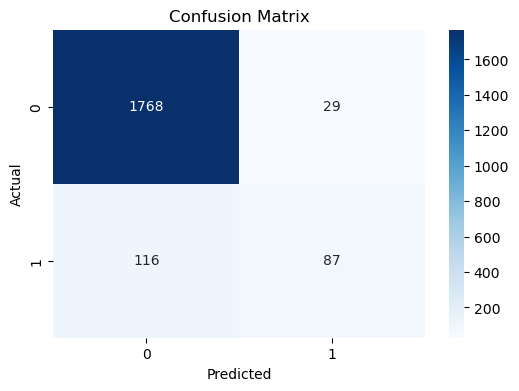

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
# Get coefficients from logistic regression model
coefficients = log_reg.coef_[0]

# Ensure we use scaled features for DataFrame
X_numeric_columns = X_numeric.columns  #only numeric features

# Create feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_numeric_columns,
    'Coefficient': coefficients
})

# Sort DataFrame by coefficients
feature_importance.sort_values(by='Coefficient', ascending=False, inplace=True)
print(feature_importance)

                       Feature  Coefficient
2  Money Laundering Risk Score     2.369301
3     Shell Companies Involved     0.064766
0                   Unnamed: 0    -0.000158
4          Transaction_Seconds    -0.000158
1                 Amount (USD)    -0.043239


In [28]:
# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='f1')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean F1 Score: {cv_scores.mean():.4f}')

Cross-Validation F1 Scores: [0.58267717 0.61538462 0.578125   0.6        0.60583942]
Mean F1 Score: 0.5964


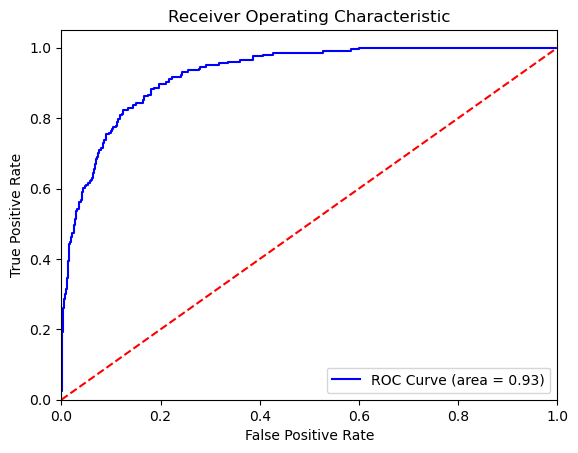

In [29]:
# Get predicted probabilities
y_scores = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model 2: Random Forest Classifier

In [30]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit model to scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Model Performance on Test Set:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Model Performance on Test Set:
Accuracy: 0.9220
Precision: 0.9119
Recall: 0.9220
F1 Score: 0.9124


In [31]:
# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit Grid Search to training data
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [32]:
# Re-train model with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# Make predictions with tuned model
y_pred_tuned = best_rf_model.predict(X_test_scaled)

# Evaluate tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print('Tuned Model Performance on Test Set:')
print(f'Accuracy: {accuracy_tuned:.4f}')
print(f'Precision: {precision_tuned:.4f}')
print(f'Recall: {recall_tuned:.4f}')
print(f'F1 Score: {f1_tuned:.4f}')

Tuned Model Performance on Test Set:
Accuracy: 0.9225
Precision: 0.9128
Recall: 0.9225
F1 Score: 0.9137


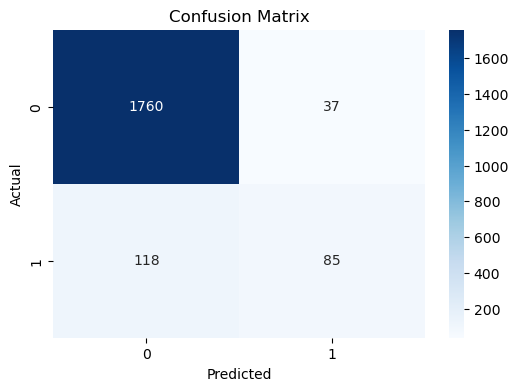

In [33]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
# Get feature importances from the Random Forest model
importance = best_rf_model.feature_importances_

X_numeric_columns = X_numeric.columns  # Numeric features from your dataset

# Create feature importance DataFrame based on Random Forest feature importances
feature_importance = pd.DataFrame({
    'Feature': X_numeric_columns,
    'Importance': importance
})

# Sort DataFrame by feature importance
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance)

                       Feature  Importance
2  Money Laundering Risk Score    0.669362
1                 Amount (USD)    0.103484
4          Transaction_Seconds    0.096804
0                   Unnamed: 0    0.096002
3     Shell Companies Involved    0.034348


In [35]:
# Perform cross-validation
cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='f1')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean F1 Score: {cv_scores.mean():.4f}')

# Get predicted probabilities
y_scores = best_rf_model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

Cross-Validation F1 Scores: [0.5625     0.59574468 0.57992565 0.57039711 0.63082437]
Mean F1 Score: 0.5879


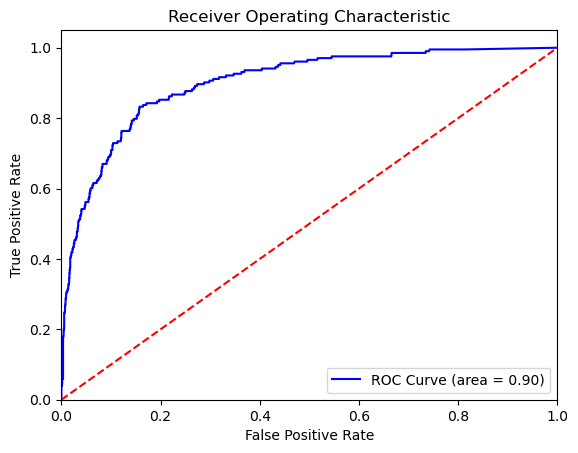

In [36]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Model 3: LightGBM

## Conclusions